SCENARIO 1 – MULTINOMIAL NAÏVE BAYES

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Load Dataset

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

df = df[["v1", "v2"]]   # Keep only required columns
df.columns = ["label", "message"]

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Basic Info

In [3]:
df.info()
df["label"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,count
label,
ham,4825
spam,747


Text Cleaning

In [4]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df["message"] = df["message"].apply(clean_text)

df.head()

,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


Encode Target Labels

In [5]:
df["label"] = df["label"].map({"ham":0, "spam":1})

Convert Text to Numerical Features (TF-IDF)

In [6]:
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(df["message"])
y = df["label"]

Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train Multinomial Naïve Bayes

In [8]:
model = MultinomialNB(alpha=1.0)   # alpha = Laplace smoothing
model.fit(X_train, y_train)

MultinomialNB()

Predictions

In [9]:
y_pred = model.predict(X_test)

Evaluation Metrics

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.967713004484305
Precision: 1.0
Recall: 0.76
F1 Score: 0.8636363636363636

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



Confusion Matrix Visualization

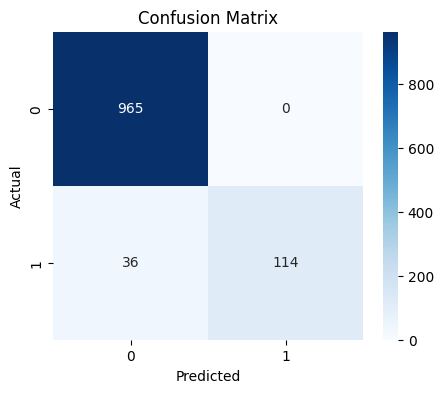

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Analyze Misclassified Messages

In [12]:
misclassified = df.iloc[y_test.index][y_test != y_pred]
misclassified.head(10)

,label,message
1044,1,we know someone who you know that fancies you ...
683,1,hi im sue i am 20 years old and work as a lapd...
15,1,xxxmobilemovieclub to use your credit click th...
4071,1,loans for any purpose even if you have bad cre...
2312,1,tddnewsletteremc1couk more games from thedaily...
3979,1,ringtoneking 84484
2877,1,hey boys want hot xxx pics sent direct 2 ur ph...
3562,1,auction round 4 the highest bid is now å£54 ne...
1268,1,can u get 2 phone now i wanna chat 2 set up me...
730,1,email alertfrom jeri stewartsize 2kbsubject lo...


Feature Importance (Top Spam Words)

In [13]:
feature_names = vectorizer.get_feature_names_out()

spam_probs = model.feature_log_prob_[1]
top_spam_words = np.argsort(spam_probs)[-20:]

print("Top Words Influencing Spam:\n")
for i in top_spam_words:
    print(feature_names[i])

Top Words Influencing Spam:

send
just
guaranteed
contact
win
service
nokia
cash
new
urgent
won
reply
text
prize
ur
stop
claim
mobile
txt
free


Word Frequency Comparison

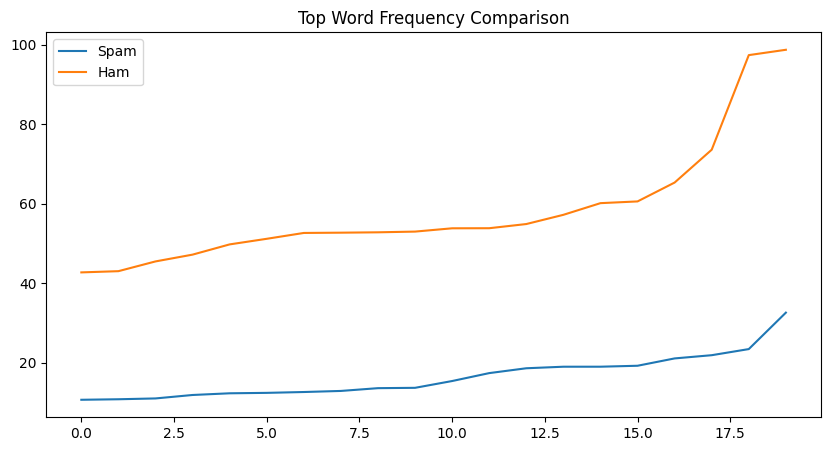

In [14]:
spam_words = df[df["label"]==1]["message"]
ham_words = df[df["label"]==0]["message"]

spam_vector = vectorizer.transform(spam_words)
ham_vector = vectorizer.transform(ham_words)

spam_counts = np.asarray(spam_vector.sum(axis=0)).ravel()
ham_counts = np.asarray(ham_vector.sum(axis=0)).ravel()

plt.figure(figsize=(10,5))
plt.plot(sorted(spam_counts)[-20:], label="Spam")
plt.plot(sorted(ham_counts)[-20:], label="Ham")
plt.legend()
plt.title("Top Word Frequency Comparison")
plt.show()

Laplace Smoothing Experiment

In [15]:
for alpha in [0.1, 0.5, 1.0, 2.0]:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Alpha={alpha} → Accuracy:", accuracy_score(y_test, y_pred))

Alpha=0.1 → Accuracy: 0.9802690582959641
Alpha=0.5 → Accuracy: 0.9775784753363229
Alpha=1.0 → Accuracy: 0.967713004484305
Alpha=2.0 → Accuracy: 0.9336322869955157


SCENARIO 2 – GAUSSIAN NAÏVE BAYES

Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Iris Dataset

In [17]:
iris = load_iris()

X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

print("Features:", feature_names)
print("Classes:", target_names)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


Convert to DataFrame (Inspection)

In [18]:
df = pd.DataFrame(X, columns=feature_names)
df["species"] = y

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Basic Data Inspection

In [19]:
df.info()
df.describe()
df["species"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,count
species,
0,50
1,50
2,50


Feature Scaling

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Train Gaussian Naïve Bayes

In [22]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Predictions

In [23]:
y_pred = gnb.predict(X_test)

Evaluation Metrics

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix Visualization

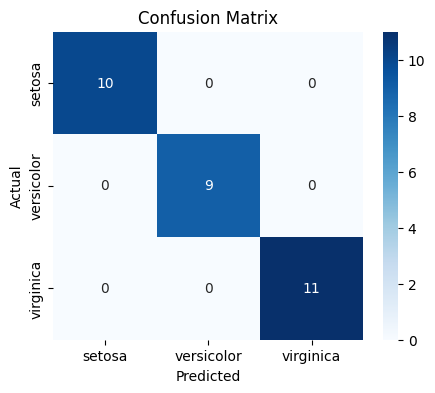

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Compare Predictions with Actual

In [26]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

comparison.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


Class Probabilities

In [27]:
probs = gnb.predict_proba(X_test)

prob_df = pd.DataFrame(probs, columns=target_names)
prob_df.head()

,setosa,versicolor,virginica
0,5.973226e-90,9.956358e-01,4.364232e-03
1,1.000000e+00,4.961577e-14,6.549219e-21
2,7.318611e-290,4.929473e-12,1.000000e+00
3,2.818383e-94,9.775936e-01,2.240644e-02
4,1.138764e-105,8.700226e-01,1.299774e-01


Decision Boundary (Using 2 Features Only)

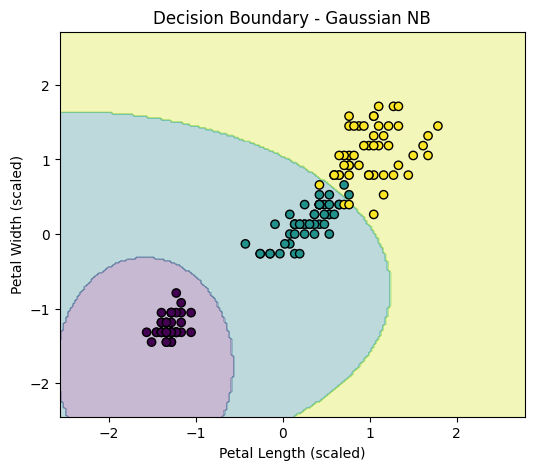

In [28]:
# Use only petal length & petal width
X2 = X_scaled[:, 2:4]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42
)

gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

# Mesh grid
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = gnb2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2[:, 0], X2[:, 1], c=y, edgecolor='k')
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Decision Boundary - Gaussian NB")
plt.show()

Probability Distribution Plot

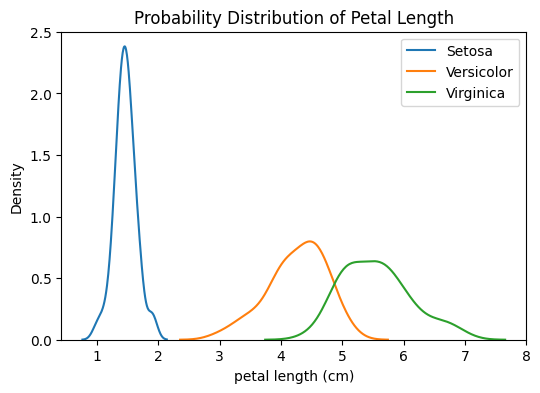

In [29]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df["species"]==0]["petal length (cm)"], label="Setosa")
sns.kdeplot(df[df["species"]==1]["petal length (cm)"], label="Versicolor")
sns.kdeplot(df[df["species"]==2]["petal length (cm)"], label="Virginica")
plt.title("Probability Distribution of Petal Length")
plt.legend()
plt.show()

Compare with Logistic Regression

In [30]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Gaussian NB Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Gaussian NB Accuracy: 1.0
Logistic Regression Accuracy: 1.0
